# Multiple Subplots

학습 날짜 : 2019 - 05- 05

아는 것은 skip

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

%matplotlib inline

## ``plt.axes``: Subplots by Hand

The most basic method of creating an axes is to use the ``plt.axes`` function.
As we've seen previously, by default this creates a standard axes object that fills the entire figure.
``plt.axes`` also takes an optional argument that is a list of four numbers in the figure coordinate system.
These numbers represent ``[left, bottom, width, height]`` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

plt.axes는 선택적으로 그림 좌표계의 네 개의 숫자 목록을 인수로 취할 수 있다.
- 아래, 왼쪽, 너비, 높이

x와 y의 위치를 0.65로 설정하고 x와 y 범위를 0.2로 설정해서(즉, 축의 크기는 그림 너비와 높이의 약 20%가 된다)
- 이렇게 하면 오른쪽 상단에 삽입된 축을 만들 수 있다.

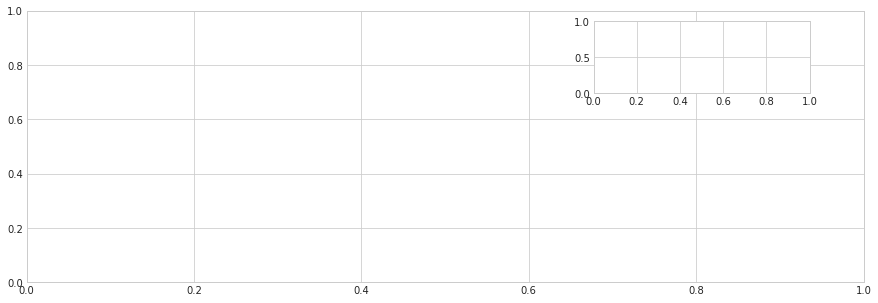

In [8]:
plt.figure(figsize = (15, 5))
ax1 = plt.axes() # 표준 축
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

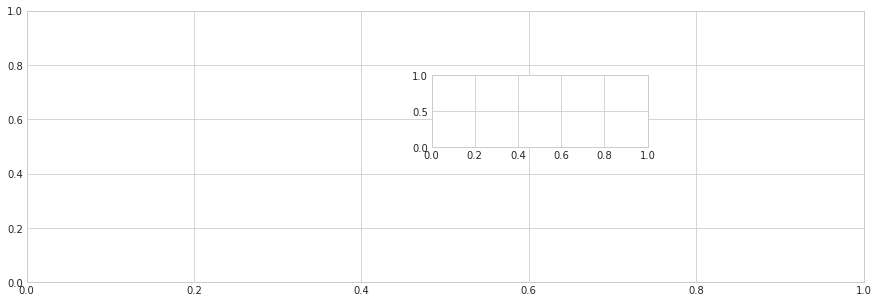

In [9]:
plt.figure(figsize = (15, 5))
ax1 = plt.axes() # 표준 축
ax2 = plt.axes([0.5, 0.5, 0.2, 0.2])

### plt.add_axes()

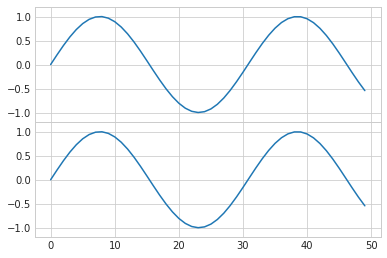

In [11]:
fig = plt.figure()

ax1 = fig.add_axes(
    [0.1, 0.5, 0.8, 0.4],
    xticklabels = [],
    ylim=(-1.2, 1.2)
)

ax2 = fig.add_axes(
    [0.1, 0.1, 0.8, 0.4],
    ylim=(-1.2, 1.2)
)

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.sin(x))

We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

위 패널의 하단(위치 0.5)이 아래 패널의 상단(위치 0.1 + 0.4)과 일치한다.

### plt.subplot : 간단한 서프블롯의 그리드

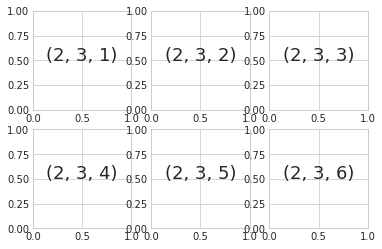

In [12]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

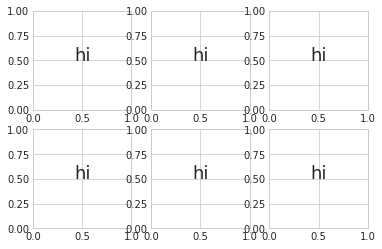

In [15]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, "hi", fontsize=18, ha='center')

### plt.subplots_adjust : 플롯들 사이의 간격을 조정하는 데 사용

- add_subplot()을 사용함
- 그림의 높이와 너비를 따라 서브플롯의 크기 단위로 간격을 지정하기 위해 plt.subplots_adjust의 hspace 와 wspace 인수 사용
  - 이 경우 간격은 서브플롯의 너비와 높이의 40%로 설정)

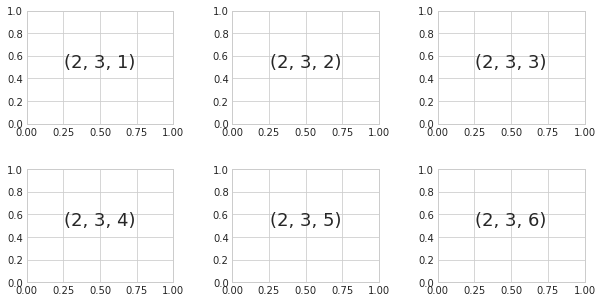

In [21]:
fig = plt.figure(figsize = (10, 5))

fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5, 0.5, str((2,3,i)), fontsize=18, ha="center")

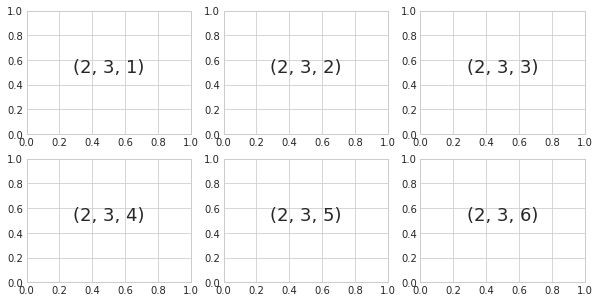

In [22]:
fig = plt.figure(figsize = (10, 5))

fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range(1, 7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5, 0.5, str((2,3,i)), fontsize=18, ha="center")

### plt.subplots : 한 번에 전체 그리드 만들기

내부의 x와 y축 레이블을 숨기고가 할 때 어떻게 해야 할까?

전체 그리드의 서브 플롯을 한 줄로 만들어 이를 numpy 배열로 반환

인수로는 행과 열의 개수와 함께 선택적으로 서로 다른 축과의 관계를 지정하는 sharex, sharey를 취한다.

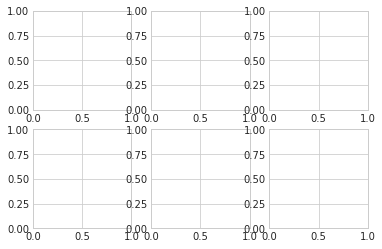

In [24]:
# sharex='col', sharey='row' 없을 경우

fig, ax = plt.subplots(2, 3)

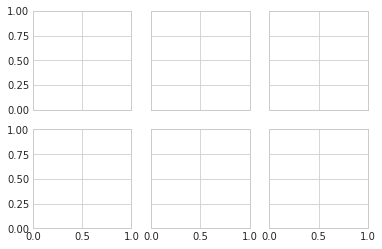

In [27]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

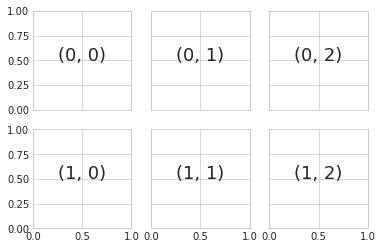

In [28]:
# 축이 2차원 배열 안에 있어 [행, 열]로 인덱싱 할 수 있음, 인덱싱은 0부터~~

for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
        
fig

### plt.GridSpec : 복잡한 배치

In [29]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
grid

GridSpec(2, 3)

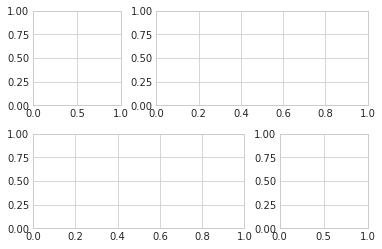

In [33]:
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

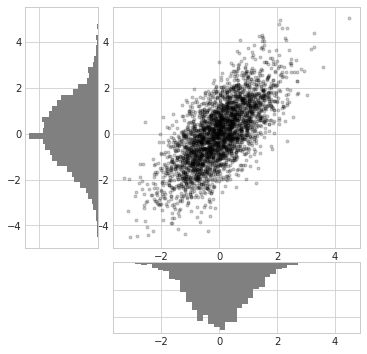

In [34]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

위의 것은 seaborn에서 구현 가능